In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import tensorflow as tf
import vgg16
import utils

!pip install scikit-image
venv\\tensorflow\\Scripts\\pip install scikit-image

In [8]:
from skimage import io
import matplotlib.pyplot as plt

#### Image Load 및 data 준비하기

In [77]:
fn1 ="./test_data/tiger.jpeg"
#fn1 ="./test_data/puzzle.jpeg"
#fn1 ="./test_data/6201041_sd.jpg"
fn2 ="./test_data/mm.jpg"
#fn2 = "./test_data/IMG_0358s.jpg"

In [78]:
i1 = io.imread(fn1)
i2 = io.imread(fn2)

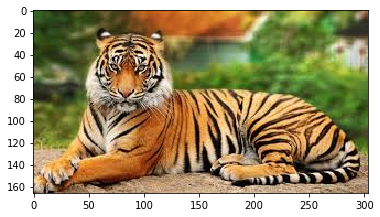

In [96]:
plt.imshow(i1)

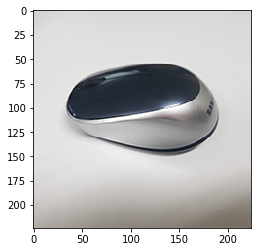

In [98]:
plt.imshow(i2)

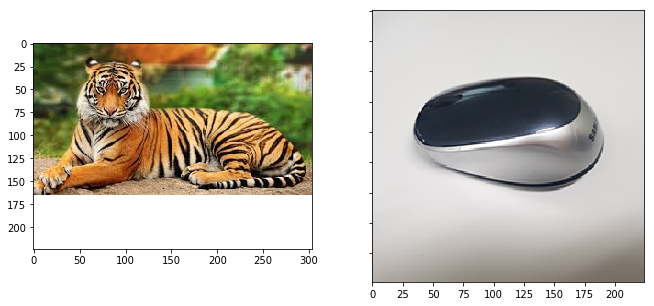

In [97]:
f, axarr = plt.subplots(1,2, sharey=True, figsize=(11,5))
axarr[0].imshow(i1)
axarr[1].imshow(i2)

In [80]:
img1 = utils.load_image(fn1)
img2 = utils.load_image(fn2)

# Just in case of using four-channel images
img1 = img1[:, :, :3]
img2 = img2[:, :, :3]

print(img1.shape)
print(img2.shape)

(224, 224, 3)
(224, 224, 3)


In [81]:
img1r = img1.reshape((1, 224, 224, 3))
img2r = img2.reshape((1, 224, 224, 3))

print(img1r.shape)
print(img2r.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [82]:
batch = np.concatenate((img1r, img2r), 0)
print(batch.shape)

(2, 224, 224, 3)


#### VGG model 

In [83]:
# !wget https://www.dropbox.com/s/8a8rei66f72um4i/vgg16.npy
vgg = vgg16.Vgg16('vgg16.npy')
#print(vgg.data_dict)

npy file loaded


#### Tensorflow

In [84]:
images = tf.placeholder("float", [2, 224, 224, 3])

In [85]:
vgg.build(images)

build model started
build model finished: 7s


* Students : vgg16.py 를 열어서 build 함수 이해하기

In [86]:
# initialize
sess = tf.InteractiveSession()

In [87]:
feed_dict = {images: batch}
prob = sess.run(vgg.prob, feed_dict=feed_dict)

#### 예측 결과 출력하기

In [88]:
print(prob[0])

[3.17088733e-09 5.07244025e-09 1.05872644e-09 2.29469843e-09
 5.10026778e-11 6.15994722e-09 1.24792243e-09 1.06688454e-07
 8.25466202e-08 5.73307126e-08 2.28812428e-06 6.02177597e-09
 5.84958970e-09 7.22982563e-09 4.58966154e-09 7.93626569e-08
 5.83563364e-10 5.54858914e-09 3.53818141e-10 1.28610966e-09
 2.47085108e-09 2.70781655e-08 1.90534588e-09 4.97443464e-09
 2.11313793e-08 9.73005587e-09 5.21899235e-09 1.21839139e-09
 1.65776615e-09 5.07614395e-10 5.99975269e-09 7.07930936e-10
 3.33412720e-09 1.76633037e-08 8.31221492e-09 2.57834714e-08
 1.42284051e-07 1.48224146e-07 4.07635845e-08 4.03743940e-07
 2.14506324e-09 3.30699834e-07 2.08427986e-09 3.46129632e-08
 7.68477104e-09 3.44609447e-07 1.87470555e-08 5.59177638e-09
 4.10665315e-08 1.42383968e-07 2.81769825e-08 7.21696125e-08
 2.64849120e-09 2.73193801e-09 1.03320392e-08 1.43537759e-09
 5.62095046e-08 3.80479648e-09 4.39980585e-09 2.34869013e-09
 5.17448058e-08 6.60588952e-08 2.84789223e-07 4.82069762e-09
 2.20147189e-09 3.132337

In [89]:
print(prob[0].shape)

(1000,)


In [90]:
print(np.argmax(prob[0]))

292


In [91]:
# returns the top1 string
def print_prob(prob, file_path):
    synset = [l.strip() for l in open(file_path).readlines()]

    # print prob
    pred = np.argsort(prob)[::-1]

    # Get top1 label
    top1 = synset[pred[0]]
    print(("Top1: ", top1, prob[pred[0]]))
    # Get top5 label
    top5 = [(synset[pred[i]], prob[pred[i]]) for i in range(5)]
    print(("Top5: ", top5))
    return top1

In [92]:
!cat synset.txt # Linux or Mac users
#!type synset.txt # Windows users

'cat'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [93]:
top1 = print_prob(prob[0], 'synset.txt')

('Top1: ', 'n02129604 tiger, Panthera tigris', 0.8209941)
('Top5: ', [('n02129604 tiger, Panthera tigris', 0.8209941), ('n02123159 tiger cat', 0.17724687), ('n02128925 jaguar, panther, Panthera onca, Felis onca', 0.0012660765), ('n02127052 lynx, catamount', 0.00020411507), ('n02128385 leopard, Panthera pardus', 0.00016284417)])


In [94]:
print("Top1: {}".format(top1))

Top1: n02129604 tiger, Panthera tigris


In [95]:
print_prob(prob[1], 'synset.txt')

('Top1: ', 'n03793489 mouse, computer mouse', 0.9544855)
('Top5: ', [('n03793489 mouse, computer mouse', 0.9544855), ('n03657121 lens cap, lens cover', 0.009180869), ('n04074963 remote control, remote', 0.00834739), ('n03929660 pick, plectrum, plectron', 0.0041532684), ('n03777754 modem', 0.0027263525)])


'n03793489 mouse, computer mouse'